In [62]:
import morpheus as mp

#optional: set the default style for matplotlib
!pip install umap-learn mplscience -Uqqqq
import mplscience
mplscience.available_styles()
mplscience.set_style(reset_current=True)

%reload_ext autoreload
%autoreload 2

['default', 'despine']


In [63]:
# initialize two SpatialDataset Object (modify the path to the data on your machine)
BASE_DIR = "/groups/mthomson/zwang2/IMC/output/hochMelanoma_sz48_pxl3_nc41/replicate"
mla_data = mp.SpatialDataset(
    input_path=f"{BASE_DIR}/singlecell.csv",  # path to the single cell data
    model_path=f"{BASE_DIR}/model/epoch=21-step=7106.ckpt",  # path to the trained model
    additional_cols=[
        "Cancer_Stage"
    ],  # additional columns to be loaded from the single cell data
)

42 channels inferred from input CSV: ['Vimentin', 'CD163', 'B2M', 'CD134', 'CD68', 'GLUT1', 'CD3', 'Lag3', 'PD1', 'CCL4_mRNA', 'CCL18_mRNA', 'HistoneH3', 'CCR2', 'PDL1', 'CXCL8_mRNA', 'CXCL10_mRNA', 'CXCL12_mRNA', 'CXCL13_mRNA', 'CD8', 'CCL2_mRNA', 'CCL22_mRNA', 'CXCL9_mRNA', 'SMA', 'DapB_mRNA', 'SOX10', 'CCL8_mRNA', 'CD31', 'CCL19_mRNA', 'Mart1', 'pRB', 'cleavedPARP', 'DNA1', 'DNA2', 'CK5', 'CD15', 'MPO', 'CD38', 'HLADR', 'S100', 'Cadherin11', 'FAP', 'IHC_T_score']
Input path: /groups/mthomson/zwang2/IMC/output/hochMelanoma_sz48_pxl3_nc41/replicate/singlecell.csv
Patch path: /groups/mthomson/zwang2/IMC/output/hochMelanoma_sz48_pxl3_nc41/replicate/patch.h5
Split directory: /groups/mthomson/zwang2/IMC/output/hochMelanoma_sz48_pxl3_nc41/replicate/split
Model path: /groups/mthomson/zwang2/IMC/output/hochMelanoma_sz48_pxl3_nc41/replicate/model/epoch=21-step=7106.ckpt
Counterfactual directory: /groups/mthomson/zwang2/IMC/output/hochMelanoma_sz48_pxl3_nc41/replicate/cf


In [47]:
BASE_DIR = "/groups/mthomson/zwang2/IMC/output/cedarsLiver_sz48_pxl3_nc44/replicate"
crc_data = mp.SpatialDataset(
    input_path=f"{BASE_DIR}/singlecell.csv",
    model_path=f"{BASE_DIR}/model/epoch=27-step=9744.ckpt",
    additional_cols=["type", "FLD"],
)

44 channels inferred from input CSV: ['CD45', 'Glnsynthetase', 'CD163', 'NKG2D', 'CCR4', 'PDL1', 'FAP', 'CD11c', 'LAG3', 'HepPar1', 'FOXP3', 'aSMA', 'CD4', 'CD105endoglin', 'CD68', 'VISTA', 'CD20', 'CD8a', 'TIM3', 'CXCR4', 'PD1', 'iNOS', 'CD31', 'CYR61', 'CDX2', 'CAIX', 'CD3', 'CD44', 'CD15', 'CD11b', 'HLADR', 'IL10', 'CXCL12', 'HLAABC', 'DNA1', 'DNA2', 'GranzymeB', 'Ki67', 'HistoneH3', 'CXCR3', 'Galectin9', 'YAP', 'CD14', 'CK19']
Input path: /groups/mthomson/zwang2/IMC/output/cedarsLiver_sz48_pxl3_nc44/replicate/singlecell.csv
Patch path: /groups/mthomson/zwang2/IMC/output/cedarsLiver_sz48_pxl3_nc44/replicate/patch.h5
Split directory: /groups/mthomson/zwang2/IMC/output/cedarsLiver_sz48_pxl3_nc44/replicate/split
Model path: /groups/mthomson/zwang2/IMC/output/cedarsLiver_sz48_pxl3_nc44/replicate/model/epoch=27-step=9744.ckpt
Counterfactual directory: /groups/mthomson/zwang2/IMC/output/cedarsLiver_sz48_pxl3_nc44/replicate/cf


In [48]:
BASE_DIR = "/groups/mthomson/zwang2/IMC/output/danenbergBreast_sz48_pxl3_nc39/replicate"
bst_data = mp.SpatialDataset(
    input_path=f"{BASE_DIR}/singlecell.csv",
    model_path=f"{BASE_DIR}/model/epoch=15-step=8896.ckpt",
)

39 channels inferred from input CSV: ['Histone H3', 'SMA', 'CK5', 'CD38', 'HLA-DR', 'CK8-18', 'CD15', 'FSP1', 'CD163', 'ICOS', 'OX40', 'CD68', 'HER2 (3B5)', 'CD3', 'Podoplanin', 'CD11c', 'PD-1', 'GITR', 'CD16', 'HER2 (D8F12)', 'CD45RA', 'B2M', 'CD45RO', 'FOXP3', 'CD20', 'ER', 'CD8', 'CD57', 'Ki-67', 'PDGFRB', 'Caveolin-1', 'CD4', 'CD31-vWF', 'CXCL12', 'HLA-ABC', 'panCK', 'c-Caspase3', 'DNA1', 'DNA2']
Input path: /groups/mthomson/zwang2/IMC/output/danenbergBreast_sz48_pxl3_nc39/replicate/singlecell.csv
Patch path: /groups/mthomson/zwang2/IMC/output/danenbergBreast_sz48_pxl3_nc39/replicate/patch.h5
Split directory: /groups/mthomson/zwang2/IMC/output/danenbergBreast_sz48_pxl3_nc39/replicate/split
Model path: /groups/mthomson/zwang2/IMC/output/danenbergBreast_sz48_pxl3_nc39/replicate/model/epoch=15-step=8896.ckpt
Counterfactual directory: None


#### compute number of cells removed by max pooling

In [64]:
import pandas as pd
import numpy as np
from analysis_helper import load_data_split

In [65]:
_, _, metadata = load_data_split(mla_data, data_split='train')

In [73]:
for num in ['II', '64', '53']:
    if num in metadata['PatientID'].unique():
        print(num)

II


In [ ]:
for data in [mla_data, crc_data, bst_data]:
    ncell = pd.read_csv(data.input_path, low_memory=False).shape[0]
    print(f"Number of cells in {data.input_path}: {ncell}")
    npxl = 0
    for split in ["train", "validate", "test"]:
        X, y, metadata = load_data_split(data, data_split=split)
        npxl += np.sum((np.max(X, axis=3) > 0))
    print(f"Number of non-zero pixels in {data.input_path}: {npxl}")
    print(f"Percent of cells retained: {npxl/ncell*100:.2f}%")

In [ ]:
for data in [mla_data, crc_data, bst_data]:
    sc = pd.read_csv(data.input_path, low_memory=False)
    xmin = sc[("Location_Center_X")].min()
    xmax = sc[("Location_Center_X")].max()
    ymin = sc[("Location_Center_Y")].min()
    ymax = sc[("Location_Center_Y")].max()

    # if divide by increments of 48, find the number of cells in the last increment

    ncell = sc[("Location_Center_X")].shape[0]
    print(f"Number of cells in {data.input_path}: {ncell}")

In [ ]:
sc = pd.read_csv(mla_data.input_path, low_memory=False)

# get all image id
image_id = sc[("ImageNumber")].unique()
ncell = 0
for id in image_id:
    singleimage = sc[sc[("ImageNumber")] == id].reset_index(drop=True)
    xmin = singleimage[("Location_Center_X")].min()
    xmax = singleimage[("Location_Center_X")].max()
    ymin = singleimage[("Location_Center_Y")].min()
    ymax = singleimage[("Location_Center_Y")].max()

    # if divide by increments of 48, find the number of cells in the last increment
    xrange = xmax - xmin
    yrange = ymax - ymin
    xinc = 48
    yinc = 48
    xrem = xrange % xinc
    yrem = yrange % yinc
    xlast = xmax - xrem
    ylast = ymax - yrem

    cellcount = singleimage[
        (singleimage[("Location_Center_X")] < xlast)
        & (singleimage[("Location_Center_Y")] < ylast)
    ].shape[0]

    ncell += cellcount
print(f"Number of cells in {data.input_path}: {ncell}")

### AUROC curve

In [45]:
from analysis_helper import get_data_and_model
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [49]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for name, data in {"Melanoma": mla_data, "CRC": crc_data, "Breast tumor": bst_data}.items():
    X, y, _, model = get_data_and_model(data, "test")
    preds = model(X)
    fpr[name], tpr[name], _ = roc_curve(y, preds)
    roc_auc[name] = roc_auc_score(y, preds)

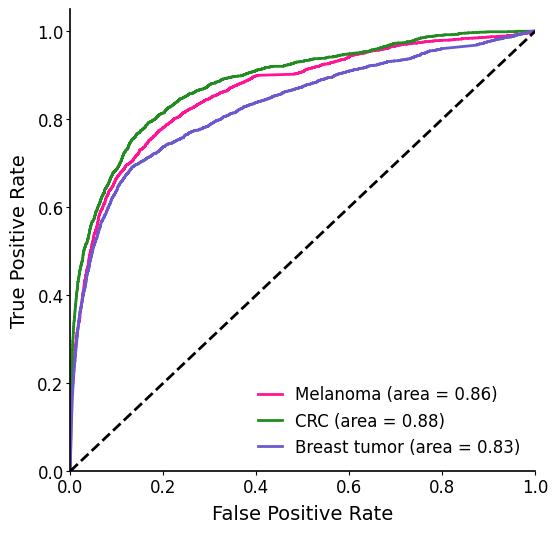

In [61]:
# Define colors or use a colormap if more datasets
colors = ["deeppink", "forestgreen", "slateblue"]
dataset_names = list(fpr.keys())  # Names of datasets

plt.figure(figsize=(6, 6))
for i, dataset in enumerate(dataset_names):
    plt.plot(fpr[dataset], tpr[dataset], color=colors[i], 
             lw=2, label=f'{dataset} (area = {roc_auc[dataset]:.2f})')

# Plotting the diagonal line for reference
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')

# Setting the plot's limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Adding a legend to the plot
plt.legend(loc="lower right")

plt.savefig("roc_curve.svg", format="svg", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()